# 🧬 Benign vs Malignant Findings

## 📋 Summary
This note outlines the clinical differences between **benign** and **malignant** findings, specifically in breast and lung evaluations.

---

## ✅ Benign Findings

- **Growth Pattern:** Non-invasive, localized
- **Borders:** Well-defined, smooth margins
- **Growth Rate:** Slow-growing or stable over time
- **Symptoms:** Often asymptomatic
- **Histology:** Normal cellular architecture, no atypia
- **Examples:**
  - **Breast:** Fibroadenoma, cyst, fibrocystic changes
  - **Lung:** Granuloma, hamartoma, post-inflammatory scar

> 💡 **Impression (Example):**  
> *No suspicious mass, distortion, or abnormal calcifications. Findings consistent with benign etiology. Routine follow-up recommended.*

---

## ⚠️ Malignant Findings

- **Growth Pattern:** Invasive, potential to spread (metastasis)
- **Borders:** Irregular, spiculated or ill-defined
- **Growth Rate:** Rapid progression
- **Symptoms:** May include pain, weight loss, cough, bleeding
- **Histology:** Atypical cells, mitotic activity, abnormal nuclei
- **Examples:**
  - **Breast:** Invasive ductal carcinoma, lobular carcinoma
  - **Lung:** Adenocarcinoma, squamous cell carcinoma, small cell carcinoma

> 🚨 **Impression (Example):**  
> *Spiculated mass in the upper outer quadrant with associated lymphadenopathy. Findings suspicious for malignancy. Biopsy recommended.*
🩺 Breast Lump Classification: Benign vs Malignant

📘 Summary

This project explores the classification of breast tumors into benign (non-cancerous) and malignant (cancerous) types using machine learning models. The goal is to identify which algorithm best predicts tumor type based on various diagnostic features.



![Malignant vs Benign](m,alivsbenign.png)
![Malignant vs Benign](malignant_vs_benign.png)
![Malignant vs Benign](benign.jpg)
![Malignant vs Benign](benignn.jpg)
![Malignant vs Benign](signs.jpg)
![Malignant vs Benign](bennign1.png)
![Malignant vs Benign](final.jpg)

# Importing the libraries

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, ConfusionMatrixDisplay,recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



**READING IN THE DATASET**

In [16]:
df = pd.read_csv(r'C:\Users\USER\Desktop\breasrcancer datazset.csv')
df


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**SHAPE OF DATASET**


In [18]:
df.shape


(569, 33)

**DISTRIBUTION OF TARGET COLUMN**

In [19]:
df['diagnosis'].value_counts(normalize=True)


diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

**DROPPING OF NULL COLUMN**

In [20]:
df.drop(columns='Unnamed: 32', axis=1,inplace=True)
df.isna().sum()


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**MAPPING TARGET COLUMN TO INT DATA TYPE**

In [21]:
df['diagnosis'] = df['diagnosis'].map({'B':0, 'M':1})


**CORRELATION MATRIX**

<Axes: >

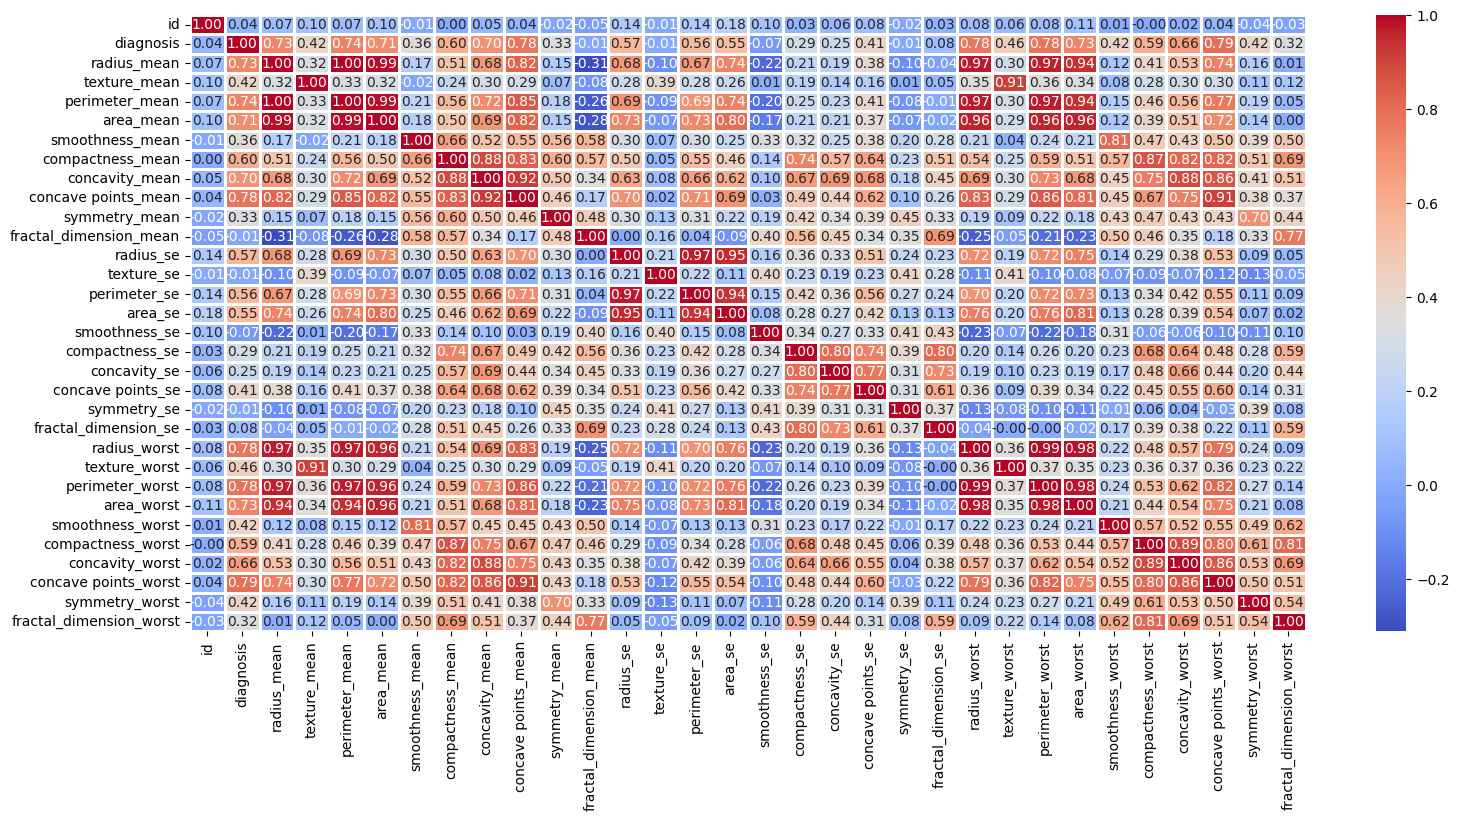

In [22]:
dcorr = df.corr()
plt.figure(figsize=(18, 8))
sns.heatmap(dcorr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.8)


**SPLITTING THE DATASET**

In [ ]:
X = df.drop(columns=['id', 'diagnosis',], axis=1)  # predictor variables
y = df['diagnosis']   # target variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42) # splitting the training and testing set


print(X.shape)
print(y.shape)
X_train.head()


(569, 30)
(569,)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
78,20.18,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,0.08142,...,23.37,31.72,170.30,1623.0,0.1639,0.6164,0.7681,0.2508,0.5440,0.09964
330,16.03,15.51,105.80,793.2,0.09491,0.13710,0.12040,0.07041,0.1782,0.05976,...,18.76,21.98,124.30,1070.0,0.1435,0.4478,0.4956,0.1981,0.3019,0.09124
378,13.66,15.15,88.27,580.6,0.08268,0.07548,0.04249,0.02471,0.1792,0.05897,...,14.54,19.64,97.96,657.0,0.1275,0.3104,0.2569,0.1054,0.3387,0.09638
213,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,0.05866,...,18.07,28.07,120.40,1021.0,0.1243,0.1793,0.2803,0.1099,0.1603,0.06818
89,14.64,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,0.2116,0.06346,...,16.34,18.24,109.40,803.6,0.1277,0.3089,0.2604,0.1397,0.3151,0.08473


**DUE TO SOMEW OF THE MODEL ARE SENSITIVE I DECIDED TO SCALE THE DATASET USING STANDARD SCALER**

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**IMPLEMENTED 4 DIFFERENT MODELS TO CHECK WHICH MODEL IS BEST**

In [ ]:
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)

# classification models
classifier = [('K nearest neighbor ', knn),
              ('logistic Regression', lr),
              ('Random Forest', rf),
              ('Decision Tree', dt)]

for class_name, classes in classifier :

    # cross validation score
    scores = cross_val_score(classes, X_scaled, y_train, cv=5, scoring='accuracy')
    print("Cross-validated scores:", scores)
    print("Mean Accuracy: {:.2f}".format(scores.mean()))

    # fitting all the classes
    classes.fit(X_scaled, y_train)

   # predicting the test set
    y_pred_tree = classes.predict(X_test_scaled)

    print('{:s} : {:.2f}'.format(class_name,accuracy_score(y_test, y_pred_tree)))


Cross-validated scores: [0.9875     0.9875     0.975      0.98734177 0.91139241]
Mean Accuracy: 0.97
K nearest neighbor  : 0.96
Cross-validated scores: [0.9625     1.         0.9875     0.97468354 0.93670886]
Mean Accuracy: 0.97
logistic Regression : 0.97
Cross-validated scores: [0.975      0.9875     0.95       0.96202532 0.88607595]
Mean Accuracy: 0.95
Random Forest : 0.96
Cross-validated scores: [0.9625     0.9625     0.925      0.86075949 0.87341772]
Mean Accuracy: 0.92
Decision Tree : 0.90


**KNEIGHBORS HAPPENS TO HAVE THE BEST ACCURACY AND CROSS VAL SCORE**

Knearest Neighbor - Train Accuracy: 0.97
Knearest Neighbor - Test Accuracy: 0.96
Cross-validated scores: [0.95       0.975      0.95       0.975      0.875      0.925
 0.9        0.925      0.84615385 0.87179487]
-------------------------
Knearest Neighbor - Accuracy: 0.96
-------------------------
Knearest Neighbor - ROC AUC: 0.95
-------------------------
Knearest Neighbor - Precision: 1.00
-------------------------
Knearest Neighbor - Recall: 0.91
-------------------------
Knearest Neighbor - F1 Score: 0.95
-------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



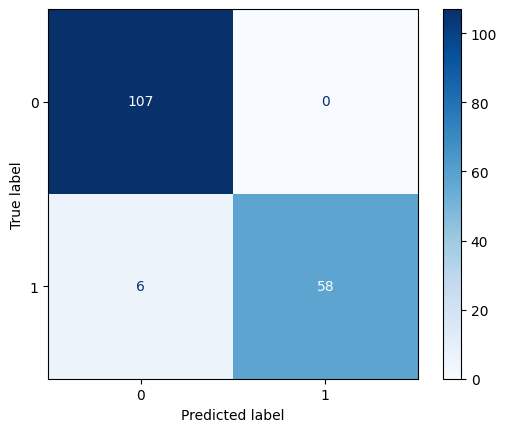

In [39]:
acc_train = knn.score(X_scaled, y_train)  # training set accuracy score
acc_test = knn.score(X_test_scaled, y_test)  # testing set accuracy score

print(f"Knearest Neighbor - Train Accuracy: {acc_train:.2f}")
print(f"Knearest Neighbor - Test Accuracy: {acc_test:.2f}")

# predicting the test set
y_pred = knn.predict(X_test_scaled)


# cross validation score
scores = cross_val_score(classes, X_scaled, y_train, cv=10, scoring='accuracy')
print("Cross-validated scores:", scores)
print('-------------------------')

# Evaluation metrics
accuracy_tree = accuracy_score(y_test, y_pred)

roc_auc_tree = roc_auc_score(y_test, y_pred)

precision_tree = precision_score(y_test, y_pred)

recall_tree = recall_score(y_test, y_pred)

f1_tree = f1_score(y_test, y_pred)

print(f"Knearest Neighbor - Accuracy: {accuracy_tree:.2f}")
print('-------------------------')
print(f"Knearest Neighbor - ROC AUC: {roc_auc_tree:.2f}")
print('-------------------------')
print(f"Knearest Neighbor - Precision: {precision_tree:.2f}")
print('-------------------------')
print(f"Knearest Neighbor - Recall: {recall_tree:.2f}")
print('-------------------------')
print(f"Knearest Neighbor - F1 Score: {f1_tree:.2f}")
print('-------------------------')


print("\nClassification Report:")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(knn, X_test_scaled, y_test, cmap='Blues')
